## Manifold learning

Main application --- dimensionality reduction for data visualization.

Question: how many dimensions would be enough to represent the data shown in the figure below?

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

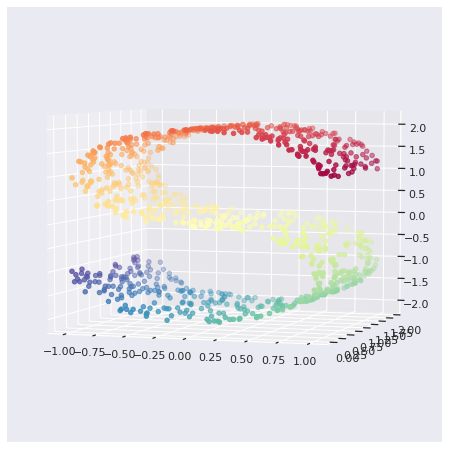

In [2]:
from sklearn.datasets import make_s_curve

X, color = make_s_curve(1000, random_state=0)
# Create figure
fig = plt.figure(figsize=(15, 8))

# Add 3d scatter plot
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

### Problem statement

To visualize data we need to convert a high-dimensional dataset $X$ into 2-3 dimensional data $Y$. Distance between data points should not decrease. The algorithm should perform well also for non-linear relationships within the data.

[Review of manifold learning methods](https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html) can be found in the book [2]. In this tutorial we will focus on t-SNE.

### t-distributed Stochastic Neighbor Embedding (t-SNE)

Stochastic Neighbor Embedding(SNE) starts by converting the high-dimensional Euclidean distances between data points into conditional probabilities that represent similarities. The similarity of data point $x_j$ to data point $x_i$ is the conditional probability, $p_{j|i}$, that $x_i$ would pick $x_j$ as its neighbor if neighbors were picked in proportion to their probability density under a Gaussian centered at $x_i$. For nearby data points, $p_{j|i}$ is relatively high, whereas for widely separated data points, $p_{j|i}$ will be almost infinitesimal (for reasonable values of the variance of the Gaussian, $\sigma_i$) [4]. t-SNE uses symmetrized conditional probabilities $p_{ij} = \frac{p_{j|i} +p_{i|j}}{2}$. Mathematically, $p_{ij}$ is expressed as:

$$p_{ij} = \frac{\exp\left(-||x_i-x_j||^2/2\sigma_i^2\right)}{\sum\limits_{k\ne i}\exp\left(-||x_i-x_k||^2/2\sigma_i^2\right)}$$

For the low-dimensional counterparts $y_i$ and $y_j$ of the high-dimensional data points $x_i$ and $x_j$, it is possible to compute a similar symmetrized conditional probability, $q_{ij}$. For this t-SNE uses a *Student t-distribution* rather than a Gaussian [4]:

$$q_{ij} = \frac{\left(1 + ||y_i-y_j||^2\right)^{-1}}{\sum\limits_{k\ne l}\left(1 + ||y_k-y_l||^2\right)^{-1}}$$

Thus, t-SNE looks for the conditional probability distribution $q$ in space $Y$, which contains amount of information as close as possible to the initial distribution $p$ in space $X$. For this purpose, the [Kullback-Leibler Divergence (KLD)](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) is minimized. From the theory of information, KLD is the amount of information lost by using the distribution $q$ instead of $p$.

#### Exercise 1: 
reduce dimensionality of `digits` dataset

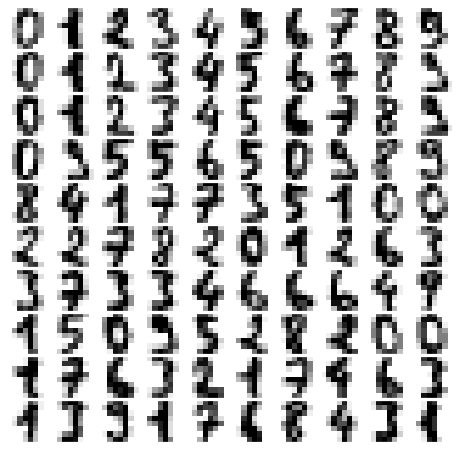

In [3]:
from sklearn.datasets import load_digits

digits  =  load_digits()

def plot_digits(data):
    fig, ax = plt.subplots(10, 10, figsize=(8, 8),
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(8, 8), cmap='binary')
        im.set_clim(0, 16)

plot_digits(digits.data)

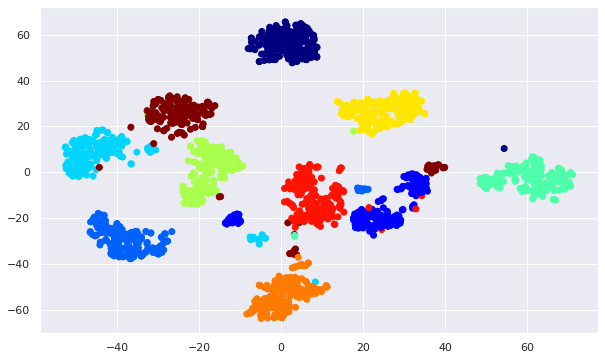

In [4]:
from sklearn import manifold

data = digits.data
labels = digits.target

# (1): use manifold.TSNE with n_components=2, init='pca', and your favorite random_state 
tsne = # put your code here
data_2d_tsne = # put your code here: run fit_transform to reduce data dimansionality

plt.figure(figsize = (10, 6))
plt.scatter(data_2d_tsne[:, 0], data_2d_tsne[:, 1], c = labels, cmap='jet')

Let's visualize digits to see whether plot makes sence after the dimensionality reduction.

In [5]:
from matplotlib import offsetbox

# this plotting function is taken from [1]
def plot_embedding(X, y, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize = (10, 6))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        # only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

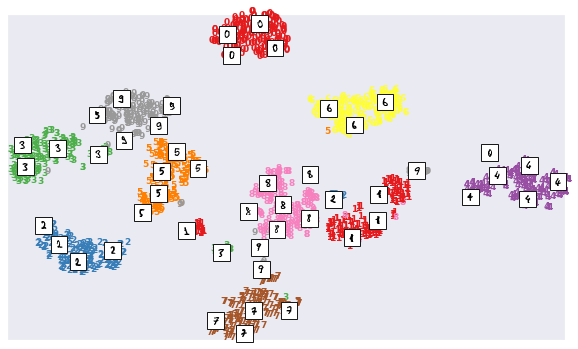

In [6]:
plot_embedding(data_2d_tsne, labels)

We have have projected data from 64-dimensional space into 2-dimensional. Did we loose substantial information? Would it be still possible to classify digits?

#### Excercise 2$^*$: advanced (optional)

Use classifier to check whether digits still can be classified. Compare classification performance to the original data.

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# (2.1): run classifier on original data
classifier = # put your code here
# put your code here

print (classification_report(classifier.predict(data), labels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       178
           1       1.00      0.98      0.99       186
           2       1.00      1.00      1.00       177
           3       0.99      0.98      0.99       184
           4       1.00      0.99      1.00       182
           5       0.99      0.99      0.99       181
           6       1.00      0.99      0.99       183
           7       0.99      0.99      0.99       180
           8       0.98      0.99      0.98       172
           9       0.96      0.99      0.97       174

    accuracy                           0.99      1797
   macro avg       0.99      0.99      0.99      1797
weighted avg       0.99      0.99      0.99      1797



In [8]:
#(2.2): run classifier on the 2D dataset, data_2d_tsne and print classification report

# put your code here

Did the F1-score of the classification performance decrease? Write your answer to the chat.

For more information about precision, recall and F1-score, please refer to [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html) and [wikipedia](https://en.wikipedia.org/wiki/F-score).

#### Excercise 3$^*$: advanced (optional)

Try other [manifold learning algorithms](https://scikit-learn.org/stable/modules/manifold.html). Which of the shows the best performance for `digits` dataset?

I do not provide solution for this exercise, but it can be found in the `scikit-learn` documentation.

### References

[[1]](https://scikit-learn.org/stable/modules/manifold.html) Scikit-learn documentation on manifold learning

[[2]](https://jakevdp.github.io/PythonDataScienceHandbook/index.html) Jake VanderPlas *Python data science handbook*, O'Reilly (2016)

[[3]](https://distill.pub/2016/misread-tsne/) Wattenberg, et al., "How to Use t-SNE Effectively", Distill, 2016. http://doi.org/10.23915/distill.00002

[[4]](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf) 
Maaten, L.v.d. and Hinton, G., *Visualizing data using t-SNE*. Journal of Machine Learning Research, Vol 9(Nov), pp. 2579—2605 (2008)

[[5]](https://lvdmaaten.github.io/tsne/) Laurens van der Maaten, *t-SNE*

[[6]](https://towardsdatascience.com/t-sne-clearly-explained-d84c537f53a) Kemal Erdem, *t-SNE clearly explained*

## Solutions

Snippet (1):

```python
tsne = manifold.TSNE(n_components = 2, init = 'pca', random_state = 0)
data_2d_tsne = tsne.fit_transform(data)
```

Snippet (2.1):

```python
classifier = KNeighborsClassifier()
classifier.fit(data, labels)
```

Snippet (2.2):

```python
classifier = KNeighborsClassifier()
classifier.fit(data_2d_tsne, labels)

print (classification_report(classifier.predict(data_2d_tsne), labels))
```